In [ ]:
import os
if '_cwd_set' not in locals(): locals()['_cwd_set'] = os.chdir(os.path.dirname(os.getcwd()))
import omnifig as fig
fig.initialize()
from src.jimports import *
from src.util import set_default_device, repo_root, data_root
from src.dataset import RawCOCO, SimpleCOCO, RawCOCOCaptions, COCOCaptions, COCO, MNIST
from src.baselines import AlignmentMetrics, ConceptAlgebra
from src.pretrained import CLIP as PretrainedCLIP
# from src.pretrained import CLIP
device = set_default_device();

Selecting CUDA device 0 with 48386 MiB free memory and 0% utilization


In [5]:
# fullddata = COCO(eval_split=-0.1)
syscfg = fig.create_config('h/ws2')
syscfg.silent=True
fullddata = COCO(eval_split=None, split='val', dataroot=syscfg.pull('dataroot'))
fullddata.prepare(device=device);
fiids = fullddata.get_image_id(np.arange(fullddata.size))
idmap = {}
for i, im in enumerate(fiids.tolist()):
    idmap.setdefault(im, []).append(i)
picks = np.array([options[0] for options in idmap.values()])
fullddata, len(picks)

(COCO[25014](index, text_features, label, image_id, caption_id, caption, image, image_features),
 5000)

In [6]:
# cfg = fig.create_config(*'norm intv/module m/ced-man a/mlp d/coco-emb'.split())
loc = Path('/data/felix/cache/checkpoints/clip128_coco_20250116_124128/ckpt_100000')
# loc = Path('/data/felix/cache/checkpoints/clip128_coco_20250116_124128/ckpt_100000')
loc = '/data/felix/cache/checkpoints/clip128_coco_20250117_231401/ckpt_020000'
# loc = '/data/felix/cache/checkpoints/clip128_coco_20250117_231821/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_003826/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_003933/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_004059/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_004241/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_125753/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_143938/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_151742/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_151951/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_143847/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_151838/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_141845/ckpt_100000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_004603/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250118_004519/ckpt_020000'
loc = '/data/felix/cache/checkpoints/clip128_coco_20250120_141247/ckpt_100000'
loc = '/ssd/felix/cache/checkpoints/clip512_coco_20250126_171823/ckpt_020000'

loc = Path(loc)
cfg = fig.create_config(*'h/ws2 a/wide m/clip d/coco-full'.split())
cfg.push('latent-dim', 512);
# cfg = fig.create_config(loc.joinpath('config.yaml'))

In [7]:
trainer = cfg.pull('trainer', silent=True)
model = trainer.model
traindataset = cfg.pull('dataset', silent=True)
valdataset = traindataset.as_eval()
metrics = cfg.pull('env.alignment', silent=True)
traindataset

COCO[532578](index, text_features, label, image_id, caption_id, caption, image, image_features)

In [8]:
traindataset.prepare(device=device);
valdataset.prepare(device=device)
system = Structured(traindataset, *trainer.gadgetry())
system.mechanize() # sync for gears and spaces
mech = system.mechanics()
model.prepare(device=device);
for p in model.parameters():
    p.requires_grad = False

In [9]:
model

CLIP(
  (text_encoder): MLP(
    (0): Linear(in_features=768, out_features=1024, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=1024, out_features=512, bias=True)
  )
  (image_encoder): MLP(
    (0): Linear(in_features=768, out_features=1024, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=1024, out_features=512, bias=True)
  )
)

In [10]:
trainable_params = sum(p.numel() for p in model.parameters())
trainable_params

4723713

In [27]:
model.load_checkpoint(path=loc.joinpath('model'));

# text_loc = '/data/felix/cache/checkpoints/sae128_cococap_20250117_171402/ckpt_080000/model-encoder.pt'
# text_loc = Path(text_loc)
# image_loc = '/data/felix/cache/checkpoints/ae128_coco_20250114_230254/ckpt_020000/model-encoder.pt'
# image_loc = Path(image_loc)
# model.text_encoder.load_checkpoint(path=text_loc)
# model.image_encoder.load_checkpoint(path=image_loc);

/home/felix/workspace/clones/foundation/omnilearn/machines.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path, map_location=torch.device('cpu'))


In [41]:
# val_img_ids = valdataset.get_image_id(np.arange(valdataset.size))
# fiids = fullddata.get_image_id(np.arange(fullddata.size))
# fiid_map = {fiid: i for i, fiid in enumerate(fiids)}
# safe_ids = set(fiids.tolist()).intersection(set(val_img_ids.tolist()))
# # inds = np.array([fiid_map[fiid] for fiid in safe_ids])
# # inds.sort()
# # save_json(inds.tolist(), 'save_inds.json')
valinds = load_json('save_inds.json')
valinds = np.array(valinds)
len(valinds), valinds[:5]

(4135, array([116, 149, 183, 192, 235]))

In [29]:
# imgdataset = SimpleCOCO(split='train',eval_split=-0.1)
# imgdataset.prepare(device=device);
# imgdataset.size

In [30]:
# val_img_ids = imgdataset.get_image_id(np.arange(imgdataset.size))
# fiids = fullddata.get_image_id(np.arange(fullddata.size))
# fiid_map = {fiid: i for i, fiid in enumerate(fiids)}
# safe_ids = set(fiids.tolist()).intersection(set(val_img_ids.tolist()))
# len(safe_ids)

In [31]:
# cl = CLIP()
# cl.prepare(device=device);
# cl._preprocess

# IDs = np.array(list(idmap.keys()))
# len(IDs)

# paths = [Path('/data/felix/coco/full/val2017') / f'{str(i).zfill(12)}.jpg' for i in IDs.tolist()]
# len(paths)

# texts = fullddata.get_captions(picks)
# images = cl.load_images(paths)
# len(texts), len(images)

# t_embs = []
# i_embs = []

# for i in range(0, len(texts), 100):
#     with torch.no_grad():
#         t_emb = cl.embed_text(texts[i:i+100])
#         i_emb = cl.embed_images(images[i:i+100])
#     t_embs.append(t_emb.cpu())
#     i_embs.append(i_emb.cpu())
# t_embs = torch.cat(t_embs)
# i_embs = torch.cat(i_embs)
# t_embs.shape, i_embs.shape
# t_embs = t_embs / t_embs.norm(dim=-1, keepdim=True)
# i_embs = i_embs / i_embs.norm(dim=-1, keepdim=True)
# t_embs.shape, i_embs.shape
# mat = t_embs @ i_embs.T
# mat.shape

In [32]:
# similarity_matrix = mat.cpu().double()
# ex = similarity_matrix.mul(-1).exp()
# total = ex.sum() - ex.diag().sum()
# N = similarity_matrix.shape[0]
# total.item() / (N * (N - 1))

In [52]:
inds = picks
batch = Context(fullddata, model, DictGadget({'index': inds[:1000], 'size': len(inds)}))
# batch = Context(valdataset, model, DictGadget({'index': valinds, 'size': len(valinds)}))
batch

Context({index}, {text_features}, {label}, {image_id}, {caption_id}, {caption}, {image}, {image_features}, {text_embedding}, {image_embedding}, {logits}, {logit_scale}, {positive_mean}, {negative_mean}, {loss}, {size})

In [53]:
mat = batch['logits']
mat.shape

torch.Size([1000, 1000])

In [57]:
order = mat.sort(dim=1).indices.cpu()
order = order - torch.arange(order.shape[1], device=order.device).unsqueeze(1)
order %= order.shape[1]
img_order = order.clone()

order = mat.t().sort(dim=1).indices.cpu()
order = order - torch.arange(order.shape[1], device=order.device).unsqueeze(1)
order %= order.shape[1]
text_order = order.clone()
order.shape

order.shape

torch.Size([1000, 1000])

In [60]:
lbls = batch['label']
tots = lbls[mat.max(dim=1).indices].float().unsqueeze(1) @ lbls.float().unsqueeze(2)
tots = tots.squeeze()
img_tots = tots.clone()

tots = lbls[mat.t().max(dim=1).indices].float().unsqueeze(1) @ lbls.float().unsqueeze(2)
tots = tots.squeeze()
text_tots = tots.clone()
lbls.shape

torch.Size([1000, 80])

In [61]:
scores = {
    'im-lab-exact': img_tots.eq(lbls.sum(-1)).float().mean().item(),
    'im-lab-1': img_tots.ge(lbls.sum(-1)-1).float().mean().item(),
    'im-lab-2': img_tots.ge(lbls.sum(-1)-2).float().mean().item(),
    'tx-lab-exact': text_tots.eq(lbls.sum(-1)).float().mean().item(),
    'tx-lab-1': text_tots.ge(lbls.sum(-1)-1).float().mean().item(),
    'tx-lab-2': text_tots.ge(lbls.sum(-1)-2).float().mean().item(),
    'im-ret1': img_order[:, -1:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret5': img_order[:, -5:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret10': img_order[:, -10:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret100': img_order[:, -100:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret1': text_order[:, -1:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret5': text_order[:, -5:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret10': text_order[:, -10:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret100': text_order[:, -100:].eq(0).sum(dim=1).float().mean().item(),
    'alignment': metrics.compute_alignment(mat),
    'uniformity': np.log(metrics.compute_uniformity(mat)).item(),
}
print(loc)
print(tabulate(scores.items(), headers=['Metric', 'Value']))

/data/felix/cache/checkpoints/clip128_coco_20250120_141247/ckpt_100000
Metric             Value
------------  ----------
im-lab-exact   0.353
im-lab-1       0.635
im-lab-2       0.788
tx-lab-exact   0.383
tx-lab-1       0.626
tx-lab-2       0.794
im-ret1        0.073
im-ret5        0.21
im-ret10       0.324
im-ret100      0.849
tx-ret1        0.07
tx-ret5        0.221
tx-ret10       0.34
tx-ret100      0.853
alignment      0.859153
uniformity    -0.0228051


In [11]:
fullddata = COCO(eval_split=None, split='val', dataroot=syscfg.pull('dataroot'))
fullddata.prepare(device=device);
fiids = fullddata.get_image_id(np.arange(fullddata.size))
idmap = {}
for i, im in enumerate(fiids.tolist()):
    idmap.setdefault(im, []).append(i)
picks = np.array([options[0] for options in idmap.values()])
fullddata, len(picks)

(COCO[25014](index, text_features, label, image_id, caption_id, caption, image, image_features),
 5000)

In [90]:
ckptname = 'ckpt_020000'
ckptroot = '/ssd/felix/cache/checkpoints/'
ignore_names = {'pretrained-clip', 'partial', 'random'}
def get_ckpt_path(name):
    if name in ignore_names:
        return None
    return Path(ckptroot).joinpath(name,ckptname)
def load_config(name):
    if name == 'random':
        return fig.create_config(*'h/ws2 a/wide m/clip d/coco-full'.split(), **{'batch-size': 1024, 'latent-dim': 512})
    if name == 'partial':
        return fig.create_config(*'h/ws2 a/wide m/clip d/coco-full'.split(), **{'batch-size': 1024, 'load-text-encoder': '/ssd/felix/cache/checkpoints/sae512_cococap_20250125_114125/ckpt_100000/model-encoder.pt', 'load-image-encoder': '/ssd/felix/cache/checkpoints/sae512_coco_20250124_164611/ckpt_100000/model-encoder.pt', 'latent-dim': 512})
    if name == ignore_names:
        return None
    loc = get_ckpt_path(name).joinpath('config.yaml')
    assert loc.exists()
    return fig.create_config(str(loc))
clip_fine_tune = [
    'clip512_coco_20250126_134753', # soft-donkey-47 1024
    'clip512_coco_20250126_172831', # effortless-deluge-69 2048
    'clip512_coco_20250126_164749', # dandy-night-63 4096
    'clip512_coco_20250126_163952', # misunderstood-elevator-62 8192
    'clip512_coco_20250126_161408', # smart-yogurt-60 16384
    'clip512_coco_20250126_153532', # warm-wind-58 32768
    'clip512_coco_20250126_151328', # divine-wind-57 65536
    'clip512_coco_20250126_184210', # pious-dust-76 131072
    'clip512_coco_20250126_220651', # wandering-dragon-82 262144
    'clip512_coco_20250126_221441', # rural-shape-84 full
]
clip_ref = [
    # 'clip512_coco_20250126_145615', # solar-durian-48 1048
    'clip512_coco_20250127_120641', # olive-moon-87 1024
    'clip512_coco_20250126_145714', # twilight-breeze-49
    'clip512_coco_20250126_145802', # faithful-firefly-50
    'clip512_coco_20250126_145902', # firm-elevator-51
    'clip512_coco_20250126_145930', # good-serenity-52
    'clip512_coco_20250126_150309', # cool-silence-53
    'clip512_coco_20250126_150328', # noble-fog-54
    'clip512_coco_20250126_172334', # sage-donkey-68
    'clip512_coco_20250126_182031', # northern-planet-74
    # 'clip512_coco_20250126_172144', # young-serenity-66
    'clip512_coco_20250127_121723', # spring-terrain-88
]
clip_full = {
    # 'clip512_coco_20250126_000805': 'full-cyclip', # full-cyclip
    'clip512_coco_20250127_121723': 'full-clip', # spring-terrain-88
    # 'pretrained-clip': 'pretrained-clip',
    'clip512_coco_20250127_164111': 'full-cyclip',
    'partial': 'partial',
    'clip512_coco_20250126_184210': '131072',
    'clip512_coco_20250126_220651': '262144',
    'clip512_coco_20250126_151328': '65536',
    'random': 'random',
}
all_models = clip_fine_tune + clip_ref
# all_models = list(clip_full.keys())


In [91]:
def get_dataset_size(name):
    if name == 'pretrained-clip':
        return None
    return load_config(name).pull('dataset', silent=True).size
sizes = {name: get_dataset_size(name) for name in tqdm(all_models)}
full_size = sizes[clip_ref[-1]]
assert full_size > 500000
sizes

  0%|          | 0/20 [00:00<?, ?it/s]

{'clip512_coco_20250126_134753': 1024,
 'clip512_coco_20250126_172831': 2048,
 'clip512_coco_20250126_164749': 4096,
 'clip512_coco_20250126_163952': 8192,
 'clip512_coco_20250126_161408': 16384,
 'clip512_coco_20250126_153532': 32768,
 'clip512_coco_20250126_151328': 65536,
 'clip512_coco_20250126_184210': 131072,
 'clip512_coco_20250126_220651': 262144,
 'clip512_coco_20250126_221441': 532578,
 'clip512_coco_20250127_120641': 1024,
 'clip512_coco_20250126_145714': 2048,
 'clip512_coco_20250126_145802': 4096,
 'clip512_coco_20250126_145902': 8192,
 'clip512_coco_20250126_145930': 16384,
 'clip512_coco_20250126_150309': 32768,
 'clip512_coco_20250126_150328': 65536,
 'clip512_coco_20250126_172334': 131072,
 'clip512_coco_20250126_182031': 262144,
 'clip512_coco_20250127_121723': 532578}

In [92]:
traindata = COCO(split='train', eval_split=0.1, dataroot=syscfg.pull('dataroot')).prepare(device=device)
valdata = traindata.as_eval().prepare(device=device)
def load_model(name):
    if name == 'pretrained-clip':
        pclip = PretrainedCLIP()
        pclip.gauge_apply(dict(similarity_matrix='logits', text='caption'))
        pclip.prepare(device=device);
        for p in pclip.parameters():
            p.requires_grad = False
        return pclip
    conf = load_config(name)
    trainer = conf.pull('trainer', silent=True)
    model = trainer.model
    system = Structured(traindata, *trainer.gadgetry())
    system.mechanize() # sync for gears and spaces
    mech = system.mechanics()
    model.prepare(device=device);
    ckpt = get_ckpt_path(name)
    if ckpt is not None:
        model.load_checkpoint(path=get_ckpt_path(name).joinpath('model.pt'));
    else:
        print(f'No checkpoint found for {name}')
    model._mechanics = None
    traindata._mechanics = None
    for p in model.parameters():
        p.requires_grad = False
    return model
models_cache = {name: load_model(name) for name in tqdm(all_models)}
pclip = None
def get_context(name, dataset, *base_tools):
    if name == 'pretrained-clip':
        global pclip
        if pclip is None:
            pclip = load_model(name)
        @tool('image_path')
        def get_image_path(image_id):
            paths = [dataset.dataroot.joinpath(f'{dataset.split}2017', f'{str(iid).zfill(12)}.jpg') for iid in image_id]
            return paths
        return Context(pclip, get_image_path, dataset, *base_tools, DictGadget({'index': inds, 'size': len(inds), 'name': 'pretrained-clip'}))
    model = models_cache[name] if name in models_cache else load_model(name)
    return Context(model, dataset, *base_tools)

  0%|          | 0/20 [00:00<?, ?it/s]

In [93]:
viids = valdata.get_image_id(np.arange(valdata.size))
vidmap = {}
for i, im in enumerate(viids.tolist()):
    vidmap.setdefault(im, []).append(i)
vpicks = np.array([options[0] for options in vidmap.values()])
len(vpicks)

11875

In [94]:
class LabelBasedRetrieval(Machine):
    @tool('matches_stats')
    def compute_label_matches(self, similarity_matrix, label):
        mat = label[similarity_matrix.max(dim=1).indices].float().unsqueeze(1) @ label.float().unsqueeze(2)
        return mat.squeeze()
    
    @tool('exact')
    def compute_exact(self, matches_stats, label):
        return matches_stats.eq(label.sum(-1)).float().mean().item()
    
    @tool('off_by_1')
    def compute_off_by_1(self, matches_stats, label):
        return matches_stats.ge(label.sum(-1)-1).float().mean().item()
    
    @tool('off_by_2')
    def compute_off_by_2(self, matches_stats, label):
        return matches_stats.ge(label.sum(-1)-2).float().mean().item()

In [95]:
def get_gadgets():
    img_metrics = AlignmentMetrics()
    img_metrics.gauge_apply(dict(similarity_matrix='logits'))
    img_metrics.prepare(device=device);
    img_metrics = Mechanism([AlignmentMetrics(), LabelBasedRetrieval()],
                            internal={'similarity_matrix': 'logits', 'label': 'label'},
                            external={'alignment': 'alignment', 'uniformity': 'uniformity',
                                    'exact': 'img_exact', 'off_by_1': 'img_off_by_1', 'off_by_2': 'img_off_by_2',
                                'retrieval_order': 'img_order', 'ret1': 'img_ret1', 'ret5': 'img_ret5', 'ret10': 'img_ret10'},)
    @tool('logits_T')
    def transposer(logits): return logits.t()
    text_metrics = Mechanism([AlignmentMetrics(), LabelBasedRetrieval(), transposer],
                            internal={'similarity_matrix': 'logits_T', 'label': 'label', 'logits': 'logits'},
                            external={'exact': 'text_exact', 'off_by_1': 'text_off_by_1', 'off_by_2': 'text_off_by_2',
                                'retrieval_order': 'text_order', 'ret1': 'text_ret1', 'ret5': 'text_ret5', 'ret10': 'text_ret10'},)
    text_metrics.prepare(device=device);
    yield img_metrics
    yield text_metrics

In [96]:

dataset, full_inds = valdata, vpicks
# dataset, full_inds = valdata, np.arange(1000)
dataset, full_inds = fullddata, picks
inds = full_inds[:1000]


In [97]:
num_batches = 5
batch_size = 1000

keys = [ 
    'alignment', 'uniformity', 
    'img_exact', 
    'img_ret1', 'img_ret5', 'img_ret10', 
    'text_exact', 
    'text_ret1', 'text_ret5', 'text_ret10',
]

results = {}
for i in range(num_batches):
    sel = full_inds[i*batch_size:(i+1)*batch_size]
    assert len(sel) == batch_size
    ctxs = [get_context(name, dataset, *get_gadgets(),
                DictGadget({'index': sel, 'size': len(sel), 'name': name, 'ds_size': sizes[name]})) 
        for name in all_models]
    
    for k in tqdm(keys, desc=f'Batch {i+1}/{num_batches}'):
        for ctx in ctxs:
            results.setdefault(k, {}).setdefault(ctx['name'], []).append(ctx[k])

Batch 1/5:   0%|          | 0/10 [00:00<?, ?it/s]

Batch 2/5:   0%|          | 0/10 [00:00<?, ?it/s]

Batch 3/5:   0%|          | 0/10 [00:00<?, ?it/s]

Batch 4/5:   0%|          | 0/10 [00:00<?, ?it/s]

Batch 5/5:   0%|          | 0/10 [00:00<?, ?it/s]

In [98]:
means = {key: {name: np.array(vals).mean().item() for name, vals in res.items()} for key, res in results.items()}
# means
by_model = {name: [vals[name] for vals in means.values()] for name in all_models}

# Model                           Size    alignment    uniformity    img_exact    img_ret1    img_ret5    img_ret10    text_exact    text_ret1    text_ret5    text_ret10
# ----------------------------  ------  -----------  ------------  -----------  ----------  ----------  -----------  ------------  -----------  -----------  ------------
# batchsize = 100
# partial                       532578     0.060779   -0.00701565      0.15078       0.076       0.248        0.404       0.16992         0.12          0.4          0.58
# random                        532578    0.0154365    -0.0124898       0.0873       0.002       0.048        0.094       0.08386         0.01         0.06         0.112
# pretrained-clip                          0.302246    -0.156726       0.18784       0.706       0.94         0.982       0.18596        0.67         0.916          0.98
# clip512_coco_20250127_121723  532578     0.372171    -0.0323588      0.18652       0.516       0.838        0.948       0.1873         0.506        0.85           0.94
# clip-full
# clip512_coco_20250127_164111  532578     0.381736    -0.0536373      0.183         0.506       0.844        0.942        0.1823        0.528        0.846         0.938
# cyclip-full
# clip512_coco_20250126_220651  262144     0.517721    0.00650013      0.19342       0.5         0.84          0.94       0.19216        0.518        0.852         0.946
# fine-tuned 262k
# clip512_coco_20250126_184210  131072     0.519887   -0.00766522      0.1922        0.478       0.834         0.93       0.1931         0.482        0.846         0.924
# fine-tuned 132k
# clip512_coco_20250126_151328   65536     0.472632    0.00693376      0.19598       0.476       0.828        0.924       0.18716        0.456        0.838         0.928
# fine-tuned 65k
############################
# batchsize = 1000
# Model                           Size    alignment    uniformity    img_exact    img_ret1    img_ret5    img_ret10    text_exact    text_ret1    text_ret5    text_ret10
# ----------------------------  ------  -----------  ------------  -----------  ----------  ----------  -----------  ------------  -----------  -----------  ------------
# clip512_coco_20250127_121723  532578   0.373578     -0.0303855        0.4922      0.2008      0.4672       0.6094        0.5036       0.2          0.4598        0.5998
# clip-full
# pretrained-clip                        0.30293      -0.155952         0.6652      0.4154      0.6824       0.7802        0.6338       0.375        0.6422        0.7558
# clip512_coco_20250127_164111  532578   0.387153     -0.0553075        0.494       0.2048      0.4804       0.6198        0.5054       0.2006       0.4708        0.6124
# full-cyclip
# partial                       532578   0.0583965    -0.00608182       0.1854      0.0096      0.0452       0.0808        0.2722       0.0206       0.0852        0.1432
# clip512_coco_20250126_184210  131072   0.522801     -0.0124817        0.488       0.1734      0.424        0.5678        0.4936       0.1718       0.4434        0.576
# clip512_coco_20250126_220651  262144   0.536365     -0.013041         0.4886      0.1734      0.4334       0.577         0.5032       0.185        0.4516        0.596
# clip512_coco_20250126_151328   65536   0.502173     -0.0254721        0.452       0.144       0.3702       0.503         0.4618       0.1396       0.3698        0.5028
# random                        532578  -0.00461833    0.00524163       0.0414      0.0014      0.0058       0.0098        0.033        0.0014       0.0048        0.0102

# Model                           Size    alignment    uniformity    img_exact    img_ret1    img_ret5    img_ret10    text_exact    text_ret1    text_ret5    text_ret10
# ----------------------------  ------  -----------  ------------  -----------  ----------  ----------  -----------  ------------  -----------  -----------  ------------
# fine-tuned
# clip512_coco_20250126_134753    1024     0.311048   -0.0278011        0.3262      0.0426      0.1404       0.2324        0.297        0.0354       0.127         0.2068
# clip512_coco_20250126_172831    2048     0.352586   -0.0344431        0.3666      0.0582      0.1872       0.2974        0.3492       0.0524       0.1726        0.2678
# clip512_coco_20250126_164749    4096     0.383921   -0.0379354        0.3916      0.0704      0.2182       0.335         0.3708       0.0642       0.2032        0.3206
# clip512_coco_20250126_163952    8192     0.409798   -0.0399219        0.4004      0.0768      0.2364       0.3648        0.3978       0.0754       0.239         0.3662
# clip512_coco_20250126_161408   16384     0.452256   -0.0353431        0.3966      0.0888      0.268        0.3938        0.3932       0.0816       0.264         0.389
# clip512_coco_20250126_153532   32768     0.463559   -0.030415         0.4234      0.1172      0.317        0.4458        0.4208       0.104        0.3138        0.438
# clip512_coco_20250126_151328   65536     0.502173   -0.0254721        0.452       0.144       0.3702       0.503         0.4618       0.1396       0.3698        0.5028
# clip512_coco_20250126_184210  131072     0.522801   -0.0124817        0.488       0.1734      0.424        0.5678        0.4936       0.1718       0.4434        0.576
# clip512_coco_20250126_220651  262144     0.536365   -0.013041         0.4886      0.1734      0.4334       0.577         0.5032       0.185        0.4516        0.596
# clip512_coco_20250126_221441  532578     0.527403   -0.0121224        0.5134      0.2038      0.483        0.6244        0.526        0.2148       0.5008        0.642
# clip only
# clip512_coco_20250127_120641    1024     0.293024   -0.00848371       0.1962      0.02        0.0774       0.1286        0.1884       0.0188       0.0768        0.1318
# clip512_coco_20250126_145714    2048     0.296261   -0.0195516        0.2414      0.0374      0.117        0.1854        0.251        0.0362       0.1166        0.185
# clip512_coco_20250126_145802    4096     0.325674   -0.022204         0.2474      0.0384      0.1396       0.2124        0.2514       0.0394       0.1344        0.2142
# clip512_coco_20250126_145902    8192     0.345755   -0.0283729        0.2968      0.0602      0.1826       0.2744        0.298        0.0562       0.1738        0.2692
# clip512_coco_20250126_145930   16384     0.37979    -0.0345707        0.3296      0.0738      0.2224       0.3292        0.3244       0.0696       0.2192        0.3152
# clip512_coco_20250126_150309   32768     0.376483   -0.0257119        0.3568      0.0876      0.2658       0.383         0.3642       0.0846       0.2556        0.3824
# clip512_coco_20250126_150328   65536     0.375501   -0.0163191        0.394       0.1122      0.3194       0.444         0.3942       0.1072       0.3078        0.4344
# clip512_coco_20250126_172334  131072     0.359269   -0.00607945       0.4378      0.144       0.3768       0.5108        0.4498       0.1484       0.373         0.509
# clip512_coco_20250126_182031  262144     0.346944   -0.0115246        0.4646      0.1638      0.4052       0.5442        0.4666       0.1578       0.4062        0.546
# clip512_coco_20250127_121723  532578     0.373578   -0.0303855        0.4922      0.2008      0.4672       0.6094        0.5036       0.2          0.4598        0.5998

print(tabulate([(name, sizes[name], *vals) for name, vals in by_model.items()], headers=['Model', 'Size', *means.keys()]))

Model                           Size    alignment    uniformity    img_exact    img_ret1    img_ret5    img_ret10    text_exact    text_ret1    text_ret5    text_ret10
----------------------------  ------  -----------  ------------  -----------  ----------  ----------  -----------  ------------  -----------  -----------  ------------
clip512_coco_20250126_134753    1024     0.311048   -0.0278011        0.3262      0.0426      0.1404       0.2324        0.297        0.0354       0.127         0.2068
clip512_coco_20250126_172831    2048     0.352586   -0.0344431        0.3666      0.0582      0.1872       0.2974        0.3492       0.0524       0.1726        0.2678
clip512_coco_20250126_164749    4096     0.383921   -0.0379354        0.3916      0.0704      0.2182       0.335         0.3708       0.0642       0.2032        0.3206
clip512_coco_20250126_163952    8192     0.409798   -0.0399219        0.4004      0.0768      0.2364       0.3648        0.3978       0.0754       0.239        

In [99]:

import matplotlib.patches as mpatches

# increase default font size
plt.rcParams.update({'font.size': 15})

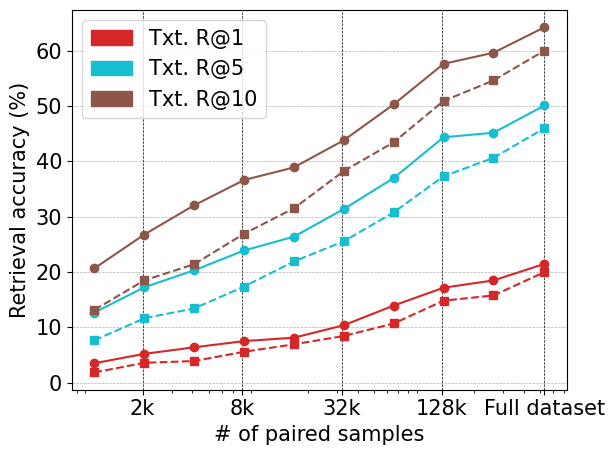

In [102]:
key = 'text_ret1'

keys = ['img_ret1', 'img_ret5', 'img_ret10', 'text_ret1', 'text_ret5', 'text_ret10',]# 'img_exact', 'text_exact']
# keys = ['img_ret1', 'img_ret5', 'img_ret10', ]#'text_ret1', 'text_ret5', 'text_ret10',]
# keys = ['text_ret1', 'text_ret5', 'text_ret10',]

fig_name, keys = 'text', ['text_ret1', 'text_ret5', 'text_ret10',]
# fig_name, keys = 'img', ['img_ret1', 'img_ret5', 'img_ret10',]

key_colors = {
    'img_ret1': 'C0',
    'img_ret5': 'C1',
    'img_ret10': 'C2',
    'text_ret1': 'C3',
    'text_ret5': 'C9',
    'text_ret10': 'C5',
}

key_titles = {
    'img_ret1': 'Image Retrieval @1',
    'img_ret5': 'Image Retrieval @5',
    'img_ret10': 'Image Retrieval @10',
    'text_ret1': 'Text Retrieval @1',
    'text_ret5': 'Text Retrieval @5',
    'text_ret10': 'Text Retrieval @10',
}
key_titles = {
    'img_ret1': 'Img. R@1',
    'img_ret5': 'Img. R@5',
    'img_ret10': 'Img. R@10',
    'text_ret1': 'Txt. R@1',
    'text_ret5': 'Txt. R@5',
    'text_ret10': 'Txt. R@10',
}

xticks = [1/(4**i) for i in range(5)][::-1]
# xticks = xs[::2] + [1]
# xticks = [int(x*full_size//1000*1000) for x in xticks]
xticks = [int(x*full_size//1000*1000) for x in xticks]
xticks = [2000, 8000, 32000, 128000, full_size]

xtick_names = [f'{x//1000}k' for x in xticks]
xtick_names[-1] = 'Full dataset'
xticks = [x for x in xticks]
# vertical lines
for x in xticks:
    plt.axvline(x, c='k', lw=0.5, ls='--')

def get_x(name):
    return sizes[name] #/ full_size
def get_y(name):
    return means[key][name] * 100
for i, key in enumerate(keys):
    # c = f'C{i}'
    c = key_colors[key]

    xs = [get_x(name) for name in clip_fine_tune]
    ys = [get_y(name) for name in clip_fine_tune]
    plt.plot(xs, ys, c=c, marker='o',)
    # with markers

    xs = [get_x(name) for name in clip_ref]
    ys = [get_y(name) for name in clip_ref]
    plt.plot(xs, ys, ls='--', c=c, marker='s',)


plt.xscale('log')

plt.xticks(xticks, xtick_names)
# plt.xticks( xs[::2] + [1], [f'{int(x*full_size//1000)}k' for x in xs[::2]] + ['full'])


# plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)


# plt.legend(['fine-tune', 'reference'])
# add a color patch to the legend C0 = img_ret5
legend = [mpatches.Patch(color=key_colors[key], label=key_titles[key]) for i, key in enumerate(keys)]
plt.legend(handles=legend)
plt.xlabel('# of paired samples')
plt.ylabel('Retrieval accuracy (%)')
plt.tight_layout();
plt.savefig(f'assets/{fig_name}_retrieval_accuracy.png', dpi=300)
plt.savefig(f'assets/{fig_name}_retrieval_accuracy.pdf');

In [ ]:
# print(tabulate([(c['name'], c['ds_size'], c['alignment'], c['uniformity'], c['img_ret1'], c['img_ret5'], c['img_ret10'], c['img_exact']) for c in ctxs]),)

In [284]:
full_size

532578

In [ ]:
ctxs = [get_context(name, dataset, img_metrics, text_metrics, 
                    DictGadget({'index': inds, 'size': len(inds), 'name': name, 'ds_size': sizes[name]})) 
            for name in tqdm(all_models)]
len(ctxs), fullddata.size

In [115]:
ctx = ctxs[0]
ctx

Context({text_embedding}, {image_embedding}, {logits}, {logit_scale}, {positive_mean}, {negative_mean}, {loss}, {index}, {text_features}, {label}, {image_id}, {caption_id}, {caption}, {image}, {image_features}, {alignment}, {uniformity}, {img_order}, {img_ret1}, {img_ret5}, {img_ret10}, {img_exact}, {img_off_by_1}, {img_off_by_2}, {text_order}, {text_ret1}, {text_ret5}, {text_ret10}, {text_exact}, {text_off_by_1}, {text_off_by_2}, {size}, {name}, {ds_size})

----------------------------  ------  --------  ------------  ----  ----  ----  ------
clip512_coco_20250126_134753    1024  0.264761   0.00843104   0.24  0.6   0.71  0.1948
clip512_coco_20250126_172831    2048  0.339893   0.00952499   0.33  0.66  0.88  0.1998
clip512_coco_20250126_164749    4096  0.366695   0.00996199   0.33  0.72  0.93  0.2075
clip512_coco_20250126_163952    8192  0.380057   0.0156673    0.34  0.75  0.92  0.203
clip512_coco_20250126_161408   16384  0.404355   0.0130633    0.45  0.82  0.9   0.196
clip512_coco_20250126_153532   32768  0.419287   0.0117828    0.46  0.84  0.94  0.1986
clip512_coco_20250126_151328   65536  0.478283  -0.000456315  0.48  0.84  0.93  0.1937
clip512_coco_20250126_184210  131072  0.522638  -0.0154677    0.48  0.82  0.95  0.1977
clip512_coco_20250126_220651  262144  0.520325   0.000643409  0.49  0.83  0.94  0.1956
clip512_coco_20250126_221441  532578  0.526608  -0.0159601    0.49  0.85  0.93  0.1944
clip512_coco_20250127_120641    1024  0.29217

In [118]:
print(tabulate([(c['name'], c['ds_size'], c['alignment'], c['uniformity'], c['img_ret1'], c['img_ret5'], c['img_ret10'], c['img_exact']) for c in ctxs]),)

----------------------------  ------  --------  -----------  -----  -----  -----  --------
clip512_coco_20250126_134753    1024  0.260533   0.00963861  0.056  0.175  0.265  0.182547
clip512_coco_20250126_172831    2048  0.333426   0.00948589  0.082  0.247  0.364  0.198273
clip512_coco_20250126_164749    4096  0.361588   0.011759    0.089  0.284  0.418  0.198375
clip512_coco_20250126_163952    8192  0.379751   0.0165184   0.101  0.294  0.451  0.199161
clip512_coco_20250126_161408   16384  0.410878   0.0130765   0.122  0.355  0.506  0.195722
clip512_coco_20250126_153532   32768  0.418393   0.0160512   0.166  0.412  0.546  0.193874
clip512_coco_20250126_151328   65536  0.468078   0.0126712   0.194  0.436  0.587  0.195629
clip512_coco_20250126_184210  131072  0.514876  -0.00300093  0.199  0.443  0.577  0.198412
clip512_coco_20250126_220651  262144  0.515111   0.0084977   0.201  0.473  0.608  0.198534
clip512_coco_20250126_221441  532578  0.521112  -0.00679976  0.229  0.494  0.62   0.197797

In [101]:
ctx['img_exact']

0.21076799929141998

In [102]:
ctx['name']

'clip512_coco_20250126_134753'

In [103]:
ctx['ds_size']

1024

In [104]:
ctx['img_ret5']

0.1550000011920929

In [105]:
mat = ctx['logits']
lbls = ctx['label']
mat.shape, lbls.shape

(torch.Size([1000, 1000]), torch.Size([1000, 80]))

In [78]:
tots = lbls[mat.max(dim=1).indices].float().unsqueeze(1) @ lbls.float().unsqueeze(2)
tots = tots.squeeze()
img_tots = tots.clone()
    # 'tx-lab-exact': text_tots.eq(lbls.sum(-1)).float().mean().item(),
    # 'tx-lab-1': text_tots.ge(lbls.sum(-1)-1).float().mean().item(),
    # 'tx-lab-2': text_tots.ge(lbls.sum(-1)-2).float().mean().item(),
img_tots

In [52]:
ctx['logits']

tensor([[ 0.4541,  0.2217,  0.2023,  ..., -0.2450,  0.1268, -0.0092],
        [ 0.3175,  0.5004,  0.0729,  ..., -0.1180,  0.0395,  0.0201],
        [ 0.0572,  0.0040,  0.4892,  ..., -0.0194, -0.1079, -0.1521],
        ...,
        [ 0.0981, -0.2405,  0.0280,  ...,  0.3269, -0.2042,  0.1680],
        [-0.0970, -0.2312, -0.0285,  ..., -0.0241,  0.1823,  0.0694],
        [ 0.1026,  0.0468,  0.0381,  ..., -0.0585,  0.2615,  0.4888]],
       device='cuda:2')

In [ ]:
inds = picks
batch = Context(fullddata, model, DictGadget({'index': inds[:1000], 'size': len(inds)}))

In [ ]:
order = mat.sort(dim=1).indices.cpu()
order = order - torch.arange(order.shape[1], device=order.device).unsqueeze(1)
order %= order.shape[1]
img_order = order.clone()

order = mat.t().sort(dim=1).indices.cpu()
order = order - torch.arange(order.shape[1], device=order.device).unsqueeze(1)
order %= order.shape[1]
text_order = order.clone()
order.shape

order.shape

torch.Size([1000, 1000])

In [ ]:
lbls = batch['label']
tots = lbls[mat.max(dim=1).indices].float().unsqueeze(1) @ lbls.float().unsqueeze(2)
tots = tots.squeeze()
img_tots = tots.clone()

tots = lbls[mat.t().max(dim=1).indices].float().unsqueeze(1) @ lbls.float().unsqueeze(2)
tots = tots.squeeze()
text_tots = tots.clone()
lbls.shape

torch.Size([1000, 80])

In [ ]:
scores = {
    'im-lab-exact': img_tots.eq(lbls.sum(-1)).float().mean().item(),
    'im-lab-1': img_tots.ge(lbls.sum(-1)-1).float().mean().item(),
    'im-lab-2': img_tots.ge(lbls.sum(-1)-2).float().mean().item(),
    'tx-lab-exact': text_tots.eq(lbls.sum(-1)).float().mean().item(),
    'tx-lab-1': text_tots.ge(lbls.sum(-1)-1).float().mean().item(),
    'tx-lab-2': text_tots.ge(lbls.sum(-1)-2).float().mean().item(),
    'im-ret1': img_order[:, -1:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret5': img_order[:, -5:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret10': img_order[:, -10:].eq(0).sum(dim=1).float().mean().item(),
    'im-ret100': img_order[:, -100:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret1': text_order[:, -1:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret5': text_order[:, -5:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret10': text_order[:, -10:].eq(0).sum(dim=1).float().mean().item(),
    'tx-ret100': text_order[:, -100:].eq(0).sum(dim=1).float().mean().item(),
    'alignment': metrics.compute_alignment(mat),
    'uniformity': np.log(metrics.compute_uniformity(mat)).item(),
}
print(loc)
print(tabulate(scores.items(), headers=['Metric', 'Value']))

/data/felix/cache/checkpoints/clip128_coco_20250120_141247/ckpt_100000
Metric             Value
------------  ----------
im-lab-exact   0.353
im-lab-1       0.635
im-lab-2       0.788
tx-lab-exact   0.383
tx-lab-1       0.626
tx-lab-2       0.794
im-ret1        0.073
im-ret5        0.21
im-ret10       0.324
im-ret100      0.849
tx-ret1        0.07
tx-ret5        0.221
tx-ret10       0.34
tx-ret100      0.853
alignment      0.859153
uniformity    -0.0228051
